# Hypothesis testing 

In this programming exercise you will explore numerical ways to calculate the power of a test and some properties of the power function. 

# Q1 (30% of exercise 5)

We saw in class that for composite hypotheses we need to consider the power function $\pi(\theta)$ instead of the power of the test $\pi$ which is a single value. 

In this question, you will evaluate the power of the following test: 

Assume that $X_1,...,X_n\sim N(\mu, \sigma^2)$ where both parameters are unknown and consider the hypotheses $H_0:\mu = 0$ vs. $H_1:\mu >0$. 

In this case, we reject the null if $\frac{\bar{X}_n}{S_n/\sqrt{n}}>t_{n-1, 1-\alpha}$ where $S_n^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X}_n)^2$ and $t_{n-1, 1-\alpha}$ is the $1-\alpha$ quantile of t distribution with $n-1$ degrees of freedom. 

A. Set $n=12$ and $\sigma^2=1$ (in reality this value is unknown)

B. Set $\mu_1=1$

C. Set $\alpha=0.05$

D. Draw a random sample $X_1,...,X_{12}\sim N(\mu_1,\sigma^2)$

E. Compute the test statistic and compare it to the critical value. Is the null rejected at significance level $\alpha$?

F. Repeat D-E 10,000 times. What is the proportion of rejections? 



In [1]:
import numpy as np 
from scipy.stats import t
np.random.seed(1984)

import matplotlib.pyplot as plt
%matplotlib inline


In [207]:
def t_test_one_sample_c(rows=10, cols=12,  mu_0=0, loc=1, scale=1, alpha=0.05):
    #creating sample
    x = np.random.normal(loc, scale, size=(rows, cols))
    x_means = x.mean(axis=1).reshape(1,x.shape[0]).T # expand dims and transpose so the subtraction will work
    x_sigma = np.sqrt((1/(cols - 1)*(x-x_means)**2).sum(axis=1))
    x_means = np.squeeze((x_means), axis=1) # remove dims so devision will result in 1,10 dims
    T = np.sqrt(cols)*(x_means - mu_0)/x_sigma

    t_alpha = t.ppf(1-alpha, cols-1)
    return (T>=t_alpha).mean()

t_test_one_sample_c(rows=10000)

0.9415

Repeat A-F for different (positive) values of $\mu_1$ and plot the power function (it is convenient to write a function that executes A-F for different values of $\mu_1$). 
Explain your results. 

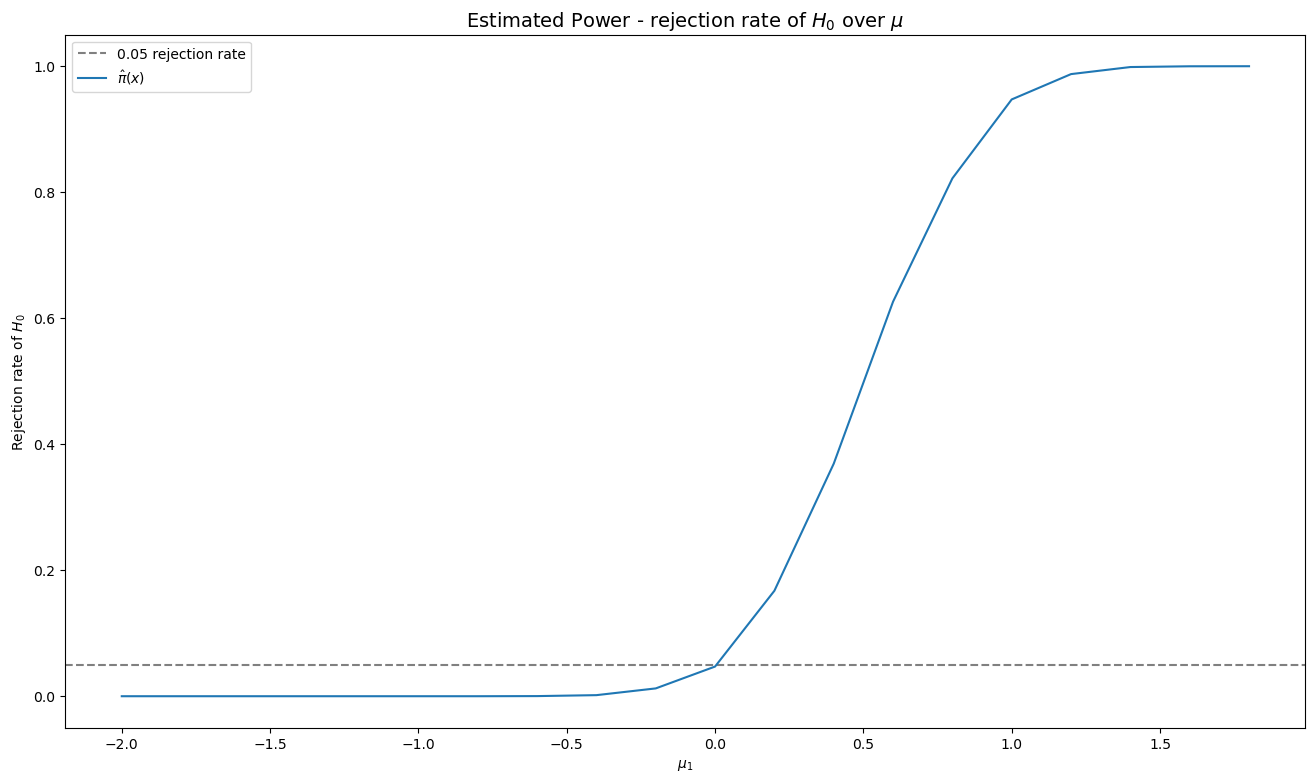

In [219]:
#Your code goes here 
mu_grid = np.arange(-2,2,0.2)
rejections = []
for mu in mu_grid:
    rejections.append(t_test_one_sample_c(rows=10000, loc=mu))
rejections = np.array(rejections)

plt.figure(figsize=(16,9))
plt.axhline(0.05, color='gray', linestyle='--', label='0.05 rejection rate')
plt.plot(mu_grid, rejections, label='$\hat{\pi}(x)$')
plt.xlabel('$\mu_1$')
plt.ylabel('Rejection rate of $H_0$')
plt.legend()
plt.title('Estimated Power - rejection rate of $H_0$ over $\mu$', size=14);

**Explanation**: recall that $\pi(x)=P_{\mu}(reject H_0)$. In the case at which $\mu_{1}=0$ we can clearly see that the rejection rate in 0.05 as we would want it to be. for $\mu_{1}<0$ we see $\pi(x)\to 0$, specifically the around 0.5 the power is already approximately 0.   

Plot on the same graph the power function for different values of $\sigma^2$. Explain your results. 

Text(0.5, 1.0, 'Rejection rate of $H_0$ over $\\sigma$')

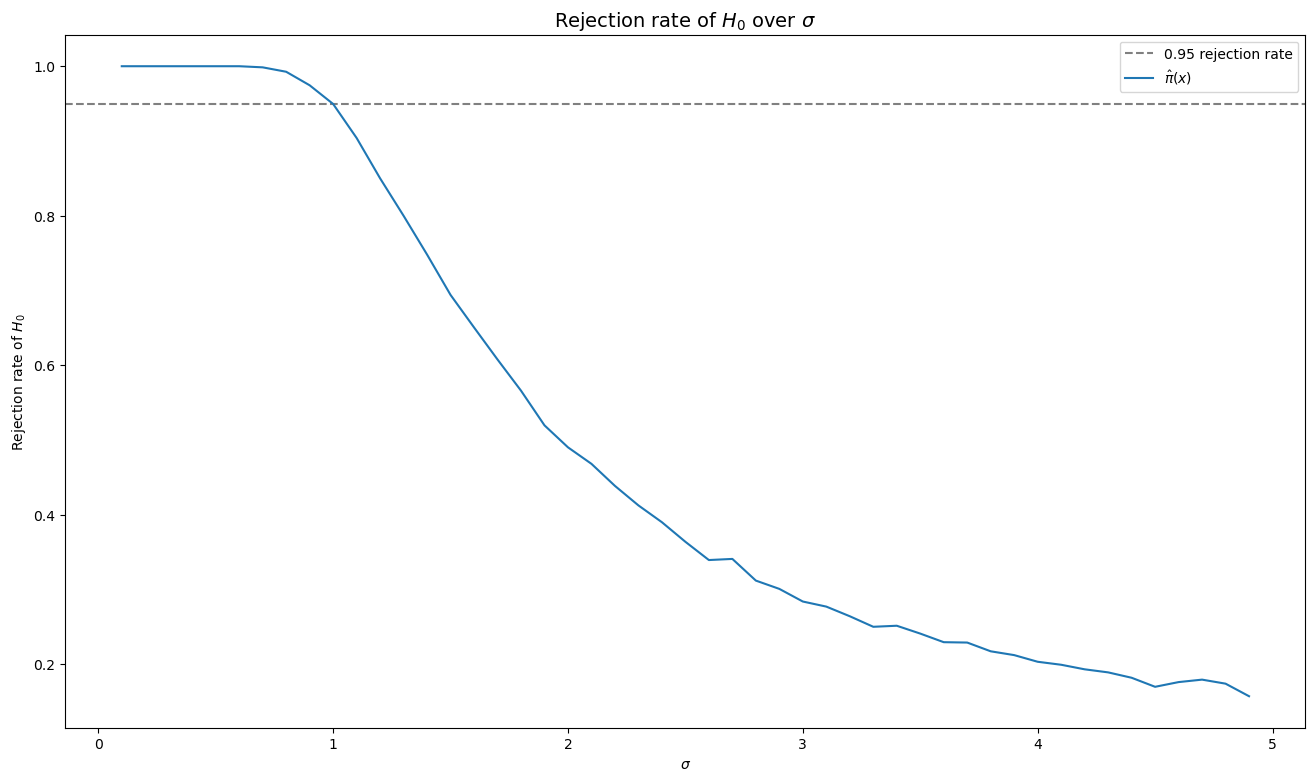

In [222]:
#Your code goes here  
sigma_grid = np.arange(0.1,5,0.1)
rejections = []
for sigma in sigma_grid:
    # rejections.append(bootstrap_power(scale=sigma))
    rejections.append(t_test_one_sample_c(rows=10000, scale=sigma))
rejections = np.array(rejections)

plt.figure(figsize=(16,9))
plt.axhline(0.95, color='gray', linestyle='--', label='0.95 rejection rate')
plt.plot(sigma_grid, rejections, label='$\hat{\pi}(x)$')
plt.xlabel('$\sigma$')
plt.ylabel('Rejection rate of $H_0$')
plt.legend()
plt.title('Rejection rate of $H_0$ over $\sigma$', size=14)

**Explanation**: the lower the variance $(\sigma)$ the lower $s$ and $T(x)$ increases. On the other hand, $s \to \infty \implies T(x) \to 0 \implies \hat{\pi}(x) \to 0$.<br>
In 0.95 we see the same estimation as in the first estimation of the rejection rate when the true variance is 1 

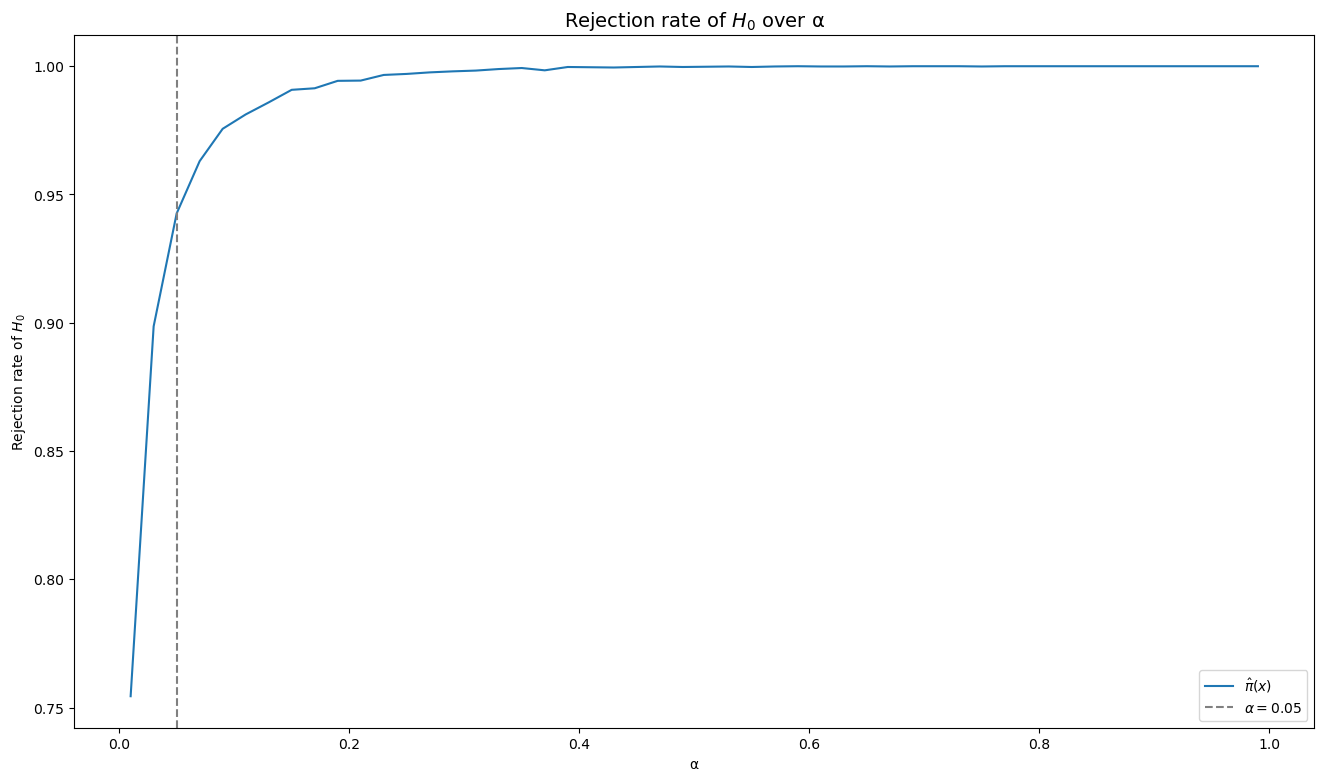

In [225]:
#Your code goes#Your code goes here  
alpha_grid = np.arange(0.01,1,0.02)
rejections = []
for alpha in alpha_grid:
    rejections.append(t_test_one_sample_c(rows=10000, alpha=alpha))
rejections = np.array(rejections)

plt.figure(figsize=(16,9))
plt.plot(alpha_grid, rejections, label='$\hat{\pi}(x)$')   
plt.axvline(0.05, color='gray', linestyle='--', label='$α = 0.05$')
plt.xlabel('α')
plt.ylabel('Rejection rate of $H_0$')
plt.legend()
plt.title('Rejection rate of $H_0$ over α', size=14);


Now fix again $\sigma^2=1$ and plot on the same graph the power function for different values of $\alpha$. Explain your results.

**Explanation**: a higher $\alpha$ leeds to a lower t-quintile ($t_{\alpha,n-1}$) , and this leeds to higher rejection rate.  